<a href="https://colab.research.google.com/github/miguelsmachado/data_science/blob/master/Panorama_do_COVID_19_no_Mundo_e_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, que apesar de todo tempo que já se passou, ainda não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos, mesmo com a grande taxa de imunizados que temos no mundo.

<center><img alt="Colaboratory logo" width="80%" src="http://www.wfeo.org/wp-content/uploads/ai-covid.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Para esta análise, vamos utilizar um conjunto de dados oriundo do site [Our World in Data](https://ourworldindata.org/coronavirus). Os dados possuem atualização diária. Na data da coleta, a última atualização havia sido feita em 22 de outubro de 2021, praticamente a 2 anos do surgimento da doença.

Muita coisa aconteceu nesse período e ainda sim temos muitas dúvidas sobre essa doença. Temos diversas fontes de dados conflitantes, algumas por falta de capacidade de coleta, outras que buscam manipular a população a respeito das informações.

Meu intuito aqui é escolher uma fonte de dados conhecida e com credibilidade e fazer uma análise de dados sem nenhum tipo de viés poítico e ideológico.


### Dicionário de Variáveis

Vamos entender o que significa cada informação de nosso dataset:

- continent - Continente
- location - país
- date - data da informação
- total_cases - total de casos
- new_cases - novos casos
- new_cases_smoothed - média móvel de novos casos (7 dias)
- total_deaths - total de mortes
- new_deaths - novas mortes
- new_deaths_smoothed - média móvel de novas mortes (7 dias)
- total_tests - número total de testes realizados
- new_tests - novos testes realizados
- people_vaccinated - número de pessoas que receberam ao menos uma dose
- people_fully_vaccinated - número que pessoas que receberam as 2 doses
- new_vaccinations - novas vacinas aplicadas
- new_vaccinations_smoothed - média móvel de novas vacinas aplicadas (7 dias)
- population - população do país
- median_age - mediana da idade da população
- life_expectancy - expectativa de vida da população
- human_development_index - IDH
- hospital_beds_per_thousand - Leitos hospitalares para cada 1000 pessoas

Vale salientar que o dataset possui muitas outras variáveis, porém vou concentrar minha análise nas relacionadas acima.



In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')


# importar o dataset COVID-19 para um DataFrame
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", 
                 date_parser=True)

df = df[['continent', 'location', 'date', 'total_cases', 'new_cases',
         'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 
         'total_tests', 'new_tests', 'people_vaccinated', 'people_fully_vaccinated', 
         'population', 'median_age', 'life_expectancy', 'human_development_index', 
         'hospital_beds_per_thousand']]

In [ ]:
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

In [ ]:
df.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_tests,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,18.6,64.83,0.511
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,18.6,64.83,0.511
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,18.6,64.83,0.511
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,18.6,64.83,0.511
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,18.6,64.83,0.511


Vou exibir qual o tamanho da base de dados utilizada

In [ ]:
print("O conjunto de dados possui %i linhas e %i colunas." %(df.shape[0], df.shape[1]))

O conjunto de dados possui 125759 linhas e 17 colunas.


Exibindo o nome de todas as colunas

In [ ]:
for coluna in df.columns:
  print('- %s' %coluna)

- continent
- location
- date
- total_cases
- new_cases
- new_cases_smoothed
- total_deaths
- new_deaths
- new_deaths_smoothed
- total_tests
- new_tests
- people_vaccinated
- people_fully_vaccinated
- population
- median_age
- life_expectancy
- human_development_index


Exibindo o tipo de variáveis de cada coluna

In [ ]:
df.dtypes

continent                          object
location                           object
date                       datetime64[ns]
total_cases                       float64
new_cases                         float64
new_cases_smoothed                float64
total_deaths                      float64
new_deaths                        float64
new_deaths_smoothed               float64
total_tests                       float64
new_tests                         float64
people_vaccinated                 float64
people_fully_vaccinated           float64
population                        float64
median_age                        float64
life_expectancy                   float64
human_development_index           float64
dtype: object

### Visualizando os dados nulos

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

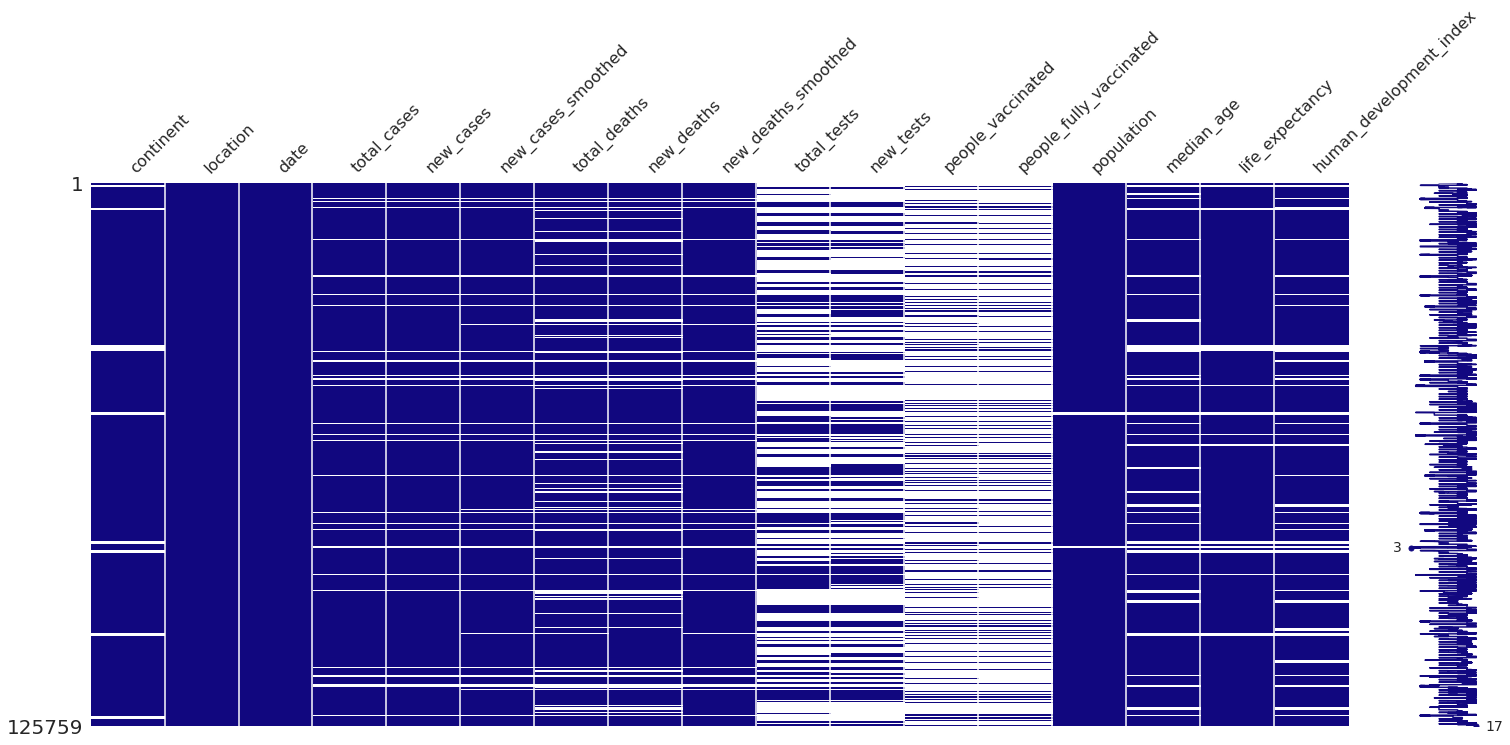

In [ ]:
msno.matrix(df, color=(0.07, 0.03, 0.5));

Análise numérica dos dados faltantes

In [ ]:
print("Em números absolutos:")
display(df.isna().sum())
print("\nEm porcentagem:")
display(df.isna().sum()/df.shape[0] * 100)

Em números absolutos:


continent                    5695
location                        0
date                            0
total_cases                  6807
new_cases                    6811
new_cases_smoothed           7825
total_deaths                17736
new_deaths                  17583
new_deaths_smoothed          7825
total_tests                 71864
new_tests                   72016
people_vaccinated           97218
people_fully_vaccinated    100314
population                    907
median_age                  14935
life_expectancy              6496
human_development_index     14574
dtype: int64


Em porcentagem:


continent                   4.528503
location                    0.000000
date                        0.000000
total_cases                 5.412734
new_cases                   5.415915
new_cases_smoothed          6.222219
total_deaths               14.103166
new_deaths                 13.981504
new_deaths_smoothed         6.222219
total_tests                57.144220
new_tests                  57.265086
people_vaccinated          77.305004
people_fully_vaccinated    79.766856
population                  0.721221
median_age                 11.875890
life_expectancy             5.165435
human_development_index    11.588833
dtype: float64

Um grande desafio inicial em uma análise de dados é decidir sobre como tratar esses dados. Por hora não farei nenhum tratamento pois inicialmente serão analizados alguns dados pontuais. Caso durante o processe se faça necessário, os dados faltantes serão completados.

## Iniciando a Análise Exploratória

Vamos iniciar a análise verificando quais top 10 países que possuem os maiores números de casos e mortes, tanto o somatório como o número total



### Exibindo os 10 países com mais casos de Covid na data atual

In [ ]:
top_cases = df.loc[df.date == '2021-10-22'].sort_values(by="total_cases", ascending=False)[['location','total_cases']]
top_cases = top_cases.set_index("location").drop(['World', 'Asia', 'Europe', 'North America',
                                      'European Union', 'South America', 'Africa']).head(10)
                                      
top_cases

,total_cases
location,
United States,45400466.0
India,34159562.0
Brazil,21711843.0
United Kingdom,8730787.0
Russia,8041581.0
Turkey,7800766.0
France,7215584.0
Iran,5844589.0
Argentina,5278910.0


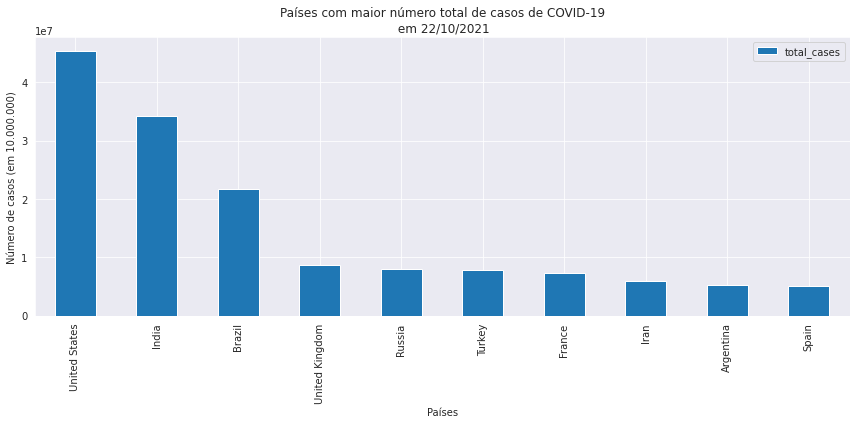

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

top_cases.plot(kind="bar", ax=ax)

ax.set_title("Países com maior número total de casos de COVID-19\n em 22/10/2021")
ax.set_xlabel("Países")
ax.set_ylabel("Número de casos (em 10.000.000)")

plt.tight_layout()

### Exibindo os 10 países com mais novos casos de Covid na data atual

In [ ]:
top_new_cases = df.loc[df.date == '2021-10-22'].sort_values(by="new_cases", ascending=False)[['location','new_cases']]
top_new_cases = top_new_cases.set_index("location").drop(['World', 'Asia', 'Europe', 'North America',
                                      'European Union', 'South America', 'Africa']).head(10)

top_new_cases

,new_cases
location,
United States,99422.0
United Kingdom,48992.0
Russia,36205.0
Turkey,28192.0
Ukraine,24721.0
India,16326.0
Romania,15410.0
Germany,15093.0
Brazil,14502.0


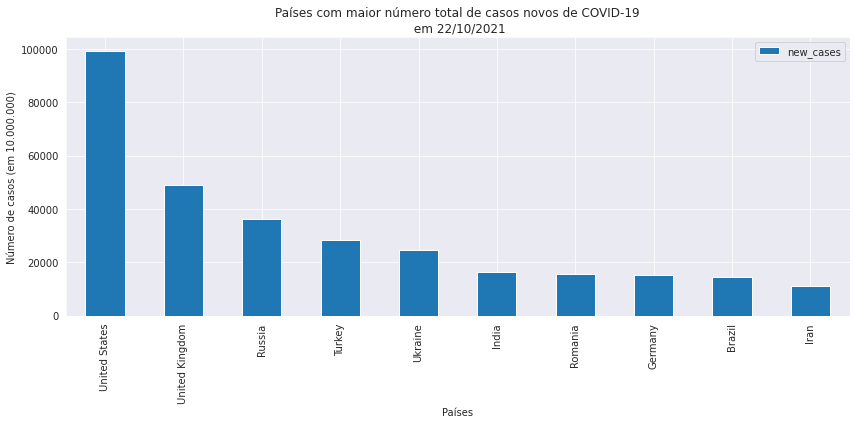

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

top_new_cases.plot(kind="bar", ax=ax)

ax.set_title("Países com maior número total de casos novos de COVID-19\n em 22/10/2021")
ax.set_xlabel("Países")
ax.set_ylabel("Número de casos (em 10.000.000)")

plt.tight_layout()

### Exibindo os 10 países com mais mortes de Covid na data atual

In [ ]:
top_deaths = df.loc[df.date == '2021-10-22'].sort_values(by="total_deaths", ascending=False)[['location','total_deaths']]
top_deaths = top_deaths.set_index("location").drop(['World', 'Asia', 'Europe', 'North America',
                                      'European Union', 'South America', 'Africa']).head(10)
top_deaths

,total_deaths
location,
United States,735373.0
Brazil,605139.0
India,453708.0
Mexico,285953.0
Russia,224369.0
Peru,200003.0
Indonesia,143153.0
United Kingdom,139743.0
Italy,131763.0


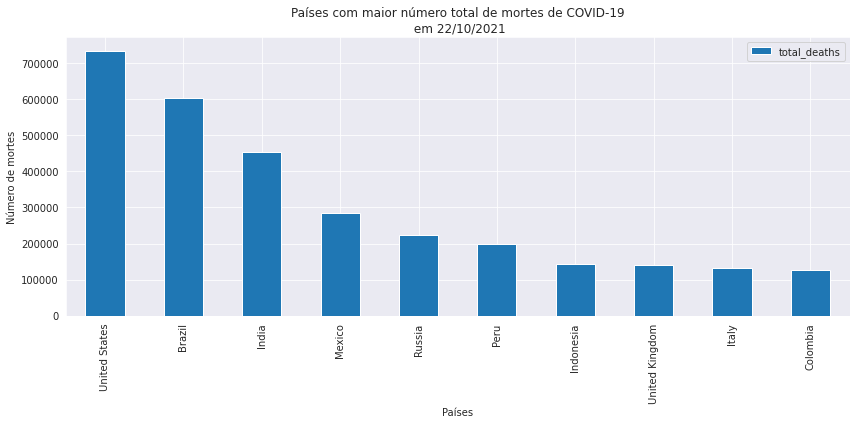

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

top_deaths.plot(kind="bar", ax=ax)

ax.set_title("Países com maior número total de mortes de COVID-19\n em 22/10/2021")
ax.set_xlabel("Países")
ax.set_ylabel("Número de mortes")

plt.tight_layout()

### Exibindo os 10 países com mais novas mortes de Covid na data atual

In [ ]:
top_new_deaths = df.loc[df.date == '2021-10-22'].sort_values(by="new_deaths", ascending=False)[['location','new_deaths']]
top_new_deaths = top_new_deaths.set_index("location").drop(['World', 'Asia', 'Europe', 'North America',
                                      'European Union', 'South America', 'Africa']).head(10)
top_new_deaths

,new_deaths
location,
United States,2159.0
Russia,1038.0
India,666.0
Ukraine,640.0
Brazil,460.0
Romania,357.0
Mexico,284.0
Philippines,283.0
Turkey,228.0


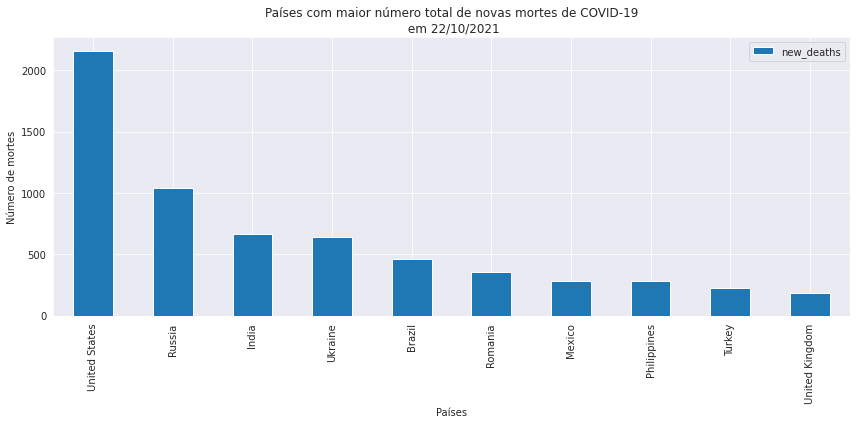

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

top_new_deaths.plot(kind="bar", ax=ax)

ax.set_title("Países com maior número total de novas mortes de COVID-19\n em 22/10/2021")
ax.set_xlabel("Países")
ax.set_ylabel("Número de mortes")

plt.tight_layout()

Apesar da análise estar interessante, como estamos vendo um dado por vez está um pouco difícil a visualização que nos permite uma comparação rápida. Dessa forma, vamos condensar os dados para facilitar esse processo

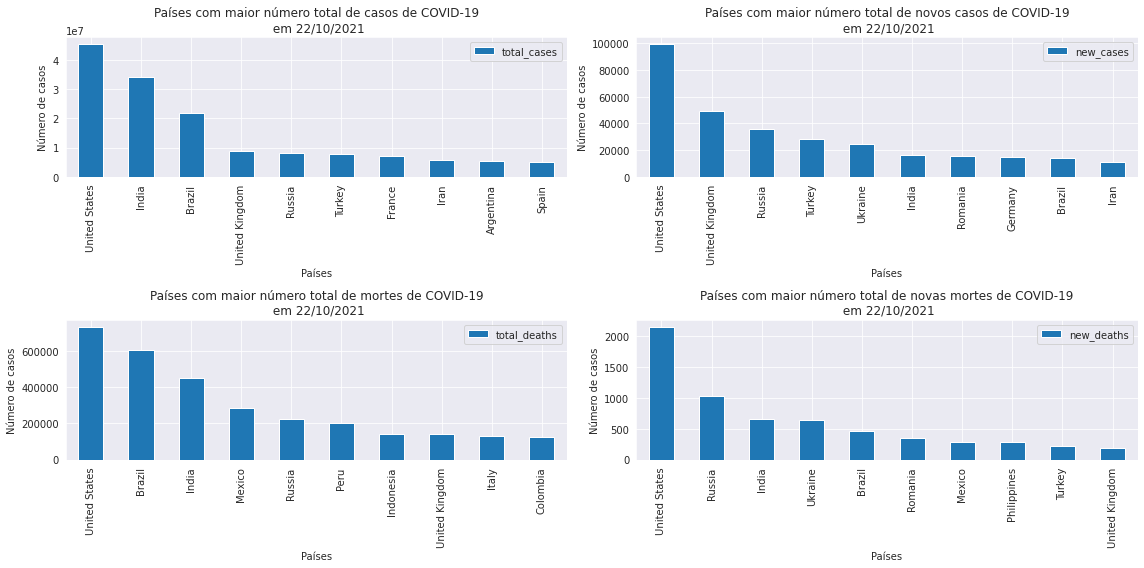

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))

top_cases.plot(kind="bar", ax=ax[0,0])
ax[0,0].set_title("Países com maior número total de casos de COVID-19\n em 22/10/2021")
ax[0,0].set_xlabel("Países")
ax[0,0].set_ylabel("Número de casos")

top_new_cases.plot(kind="bar", ax=ax[0,1])
ax[0,1].set_title("Países com maior número total de novos casos de COVID-19\n em 22/10/2021")
ax[0,1].set_xlabel("Países")
ax[0,1].set_ylabel("Número de casos")

top_deaths.plot(kind="bar", ax=ax[1,0])
ax[1,0].set_title("Países com maior número total de mortes de COVID-19\n em 22/10/2021")
ax[1,0].set_xlabel("Países")
ax[1,0].set_ylabel("Número de casos")

top_new_deaths.plot(kind="bar", ax=ax[1,1])
ax[1,1].set_title("Países com maior número total de novas mortes de COVID-19\n em 22/10/2021")
ax[1,1].set_xlabel("Países")
ax[1,1].set_ylabel("Número de casos")

plt.tight_layout()

In [ ]:
def ranking(df, nome):
  df['ranking'] = range(1, 11)
  df.reset_index(inplace=True)
  df.set_index("ranking", inplace=True)
  df.sort_index()
  df.columns = [nome, 'nr']
  df.drop("nr", axis=1, inplace=True)

In [ ]:
ranking(top_cases, "top_casos")
ranking(top_new_cases, "top_novos_casos")
ranking(top_deaths, "top_mortes")
ranking(top_new_deaths, "top_novas_mortes")

In [ ]:
pd.concat([top_cases, top_new_cases, top_deaths, top_new_deaths], axis=1)

,top_casos,top_novos_casos,top_mortes,top_novas_mortes
ranking,,,,
1,United States,United States,United States,United States
2,India,United Kingdom,Brazil,Russia
3,Brazil,Russia,India,India
4,United Kingdom,Turkey,Mexico,Ukraine
5,Russia,Ukraine,Russia,Brazil
6,Turkey,India,Peru,Romania
7,France,Romania,Indonesia,Mexico
8,Iran,Germany,United Kingdom,Philippines
9,Argentina,Brazil,Italy,Turkey


## Aprofundando a análise

Vericando os países que aperecem nesse triste ranking, escohi 3 para fazer uma análise um pouco mais aprofundada.

1. Estados Unidos - Pois é o pais que lidera todas os rankings
2. Brasil - Nosso país
3. Reino Unido - Pois é um páis com características bem distitas do Brasil e também aparece nas 4 tabelas.


Comparação do fração de casos e mortes em relação a população

In [ ]:
populacao_mundial =  df.query("location == 'World'").population.iloc[-1]
casos_populacao_mundial =  df.query("location == 'World'").total_cases.iloc[-1]

print("A população munidal em 22/10/21 é %i" %populacao_mundial)
print("O total de casos no mundo em 22/10/21 é %i" %casos_populacao_mundial)

A população munidal em 22/10/21 é 7874965730
O total de casos no mundo em 22/10/21 é 243354428


In [ ]:
top_cases = df.loc[df.date == '2021-10-22'].sort_values(by="total_cases", ascending=False)[['location','total_cases', 'population']]
top_cases = top_cases.set_index("location").drop(['World', 'Asia', 'Europe', 'North America',
                                      'European Union', 'South America', 'Africa']).head(10)

top_deaths = df.loc[df.date == '2021-10-22'].sort_values(by="total_deaths", ascending=False)[['location','total_deaths', 'population']]
top_deaths = top_deaths.set_index("location").drop(['World', 'Asia', 'Europe', 'North America',
                                      'European Union', 'South America', 'Africa']).head(10)

In [ ]:
top_cases['porcentagem_pop_mundial'] = (top_cases.population / populacao_mundial) * 100
top_cases['porcentagem_casos_pop_mundial'] = (top_cases.total_cases / casos_populacao_mundial) * 100

top_cases

,total_cases,population,porcentagem_pop_mundial,porcentagem_casos_pop_mundial
location,,,,
United States,45400466.0,3.329151e+08,4.227511,18.656108
India,34159562.0,1.393409e+09,17.694160,14.036959
Brazil,21711843.0,2.139934e+08,2.717389,8.921902
United Kingdom,8730787.0,6.820711e+07,0.866126,3.587684
Russia,8041581.0,1.459120e+08,1.852859,3.304473
Turkey,7800766.0,8.504274e+07,1.079912,3.205516
France,7215584.0,6.756425e+07,0.857962,2.965051
Iran,5844589.0,8.502876e+07,1.079735,2.401678
Argentina,5278910.0,4.560582e+07,0.579124,2.169227


Como pode ser visto acima, foi feita uma análise para verificar quais paises estão pareados nos na porcentagem da população mundial e na porcentagem de casos em relação a população mundial.

Basta olhar os número para ver que existem algumas discrepâncias, mas vou tentar melhor essa ideia.

Ao criar uma nova variável onde será feita a razão entra a `porcentagem_casos_pop_mundial` e a `porcentagem_pop_mundial`.

- O resultado dessa razão será um número que quanto for igual a 1, significará que o país teve os resultados esperados de casos de Covid.
- Quando for menor que 1 significará que o país reagiu bem a contaminação de Covid. Quanto mais próximo de 0 melhor.
- Quando for maior que 1 significará que o país reagiu mal a contaminação de Covid. Quanto mais mais alto pior.

In [ ]:
top_cases['indice_casos'] = top_cases.porcentagem_casos_pop_mundial / top_cases.porcentagem_pop_mundial

top_cases[['indice_casos', 'total_cases']].sort_values(by='indice_casos' , ascending=False)

,indice_casos,total_cases
location,,
United States,4.413024,45400466.0
United Kingdom,4.142220,8730787.0
Argentina,3.745703,5278910.0
Spain,3.459754,4997732.0
France,3.455922,7215584.0
Brazil,3.283263,21711843.0
Turkey,2.968311,7800766.0
Iran,2.224321,5844589.0
Russia,1.783445,8041581.0


Nessa classificação, temos ainda o EUA como o país com a pior situação, mas quando olhamos para o Brasil vemos que os dados crus não mostram nossa real situação quanto a contaminação. De acordo com nosso índice gerado, Reino Unido, Argentina, França e Espanha, apesar de possuirem menos casos, lidaram de uma forma pior que nós no tocante a contaminação de COVID19.

Vamos repetir a análise com o número de mortes.

In [ ]:
populacao_mundial =  df.query("location == 'World'").population.iloc[-1]
mortes_populacao_mundial =  df.query("location == 'World'").total_deaths.iloc[-1]

print("A população munidal em 22/10/21 é %i" %populacao_mundial)
print("O total de casos no mundo em 22/10/21 é %i" %casos_populacao_mundial)

A população munidal em 22/10/21 é 7874965730
O total de casos no mundo em 22/10/21 é 243354428


In [ ]:
top_deaths = df.loc[df.date == '2021-10-22'].sort_values(by="total_deaths", ascending=False)[['location','total_deaths', 'population']]
top_deaths = top_deaths.set_index("location").drop(['World', 'Asia', 'Europe', 'North America',
                                      'European Union', 'South America', 'Africa']).head(10)

In [ ]:
top_deaths['porcentagem_pop_mundial'] = (top_deaths.population / populacao_mundial) * 100
top_deaths['porcentagem_mortes_pop_mundial'] = (top_deaths.total_deaths/ mortes_populacao_mundial) * 100

top_deaths

,total_deaths,population,porcentagem_pop_mundial,porcentagem_mortes_pop_mundial
location,,,,
United States,735373.0,3.329151e+08,4.227511,14.874272
Brazil,605139.0,2.139934e+08,2.717389,12.240050
India,453708.0,1.393409e+09,17.694160,9.177079
Mexico,285953.0,1.302622e+08,1.654131,5.783926
Russia,224369.0,1.459120e+08,1.852859,4.538276
Peru,200003.0,3.335942e+07,0.423613,4.045429
Indonesia,143153.0,2.763618e+08,3.509371,2.895533
United Kingdom,139743.0,6.820711e+07,0.866126,2.826559
Italy,131763.0,6.036747e+07,0.766574,2.665149


Da mesma forma que anteriomente:

- O resultado dessa razão será um número que quanto for igual a 1, significará que o país teve os resultados esperados de mortes de Covid.
- Quando for menor que 1 significará que o país reagiu bem ao Covid. Quanto mais próximo de 0 melhor.
- Quando for maior que 1 significará que o país reagiu mal ao Covid. Quanto mais mais alto pior.

In [ ]:
top_deaths['indice_mortes'] = top_deaths.porcentagem_mortes_pop_mundial / top_deaths.porcentagem_pop_mundial

top_deaths[['indice_mortes', 'total_deaths']].sort_values(by='indice_mortes' , ascending=False)

,indice_mortes,total_deaths
location,,
Peru,9.549811,200003.0
Brazil,4.504342,605139.0
Colombia,3.945771,126994.0
United States,3.518446,735373.0
Mexico,3.496656,285953.0
Italy,3.476700,131763.0
United Kingdom,3.263451,139743.0
Russia,2.449337,224369.0
Indonesia,0.825086,143153.0


Ao contrário do que vimos quanto ao número de casos, o Brasil não soube resolver bem os casos mais graves de COVID e mantem-se em segundo lugar nesse ranking de mortes por COVID 19.

## Comparando numero de mortes com o IDH

In [ ]:
total_death = df.groupby("location")['new_deaths'].sum()
idh = df.groupby("location")['human_development_index'].mean()

idh_mortes = pd.concat([total_death, idh], axis=1).dropna().drop('World')

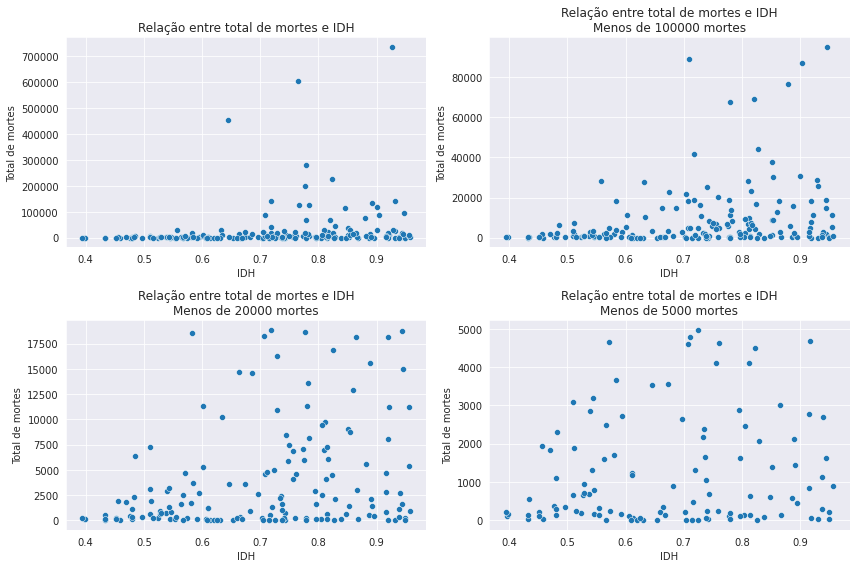

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sns.scatterplot(data=idh_mortes,
                x='human_development_index', y='new_deaths', ax=ax[0,0])
ax[0,0].set_title("Relação entre total de mortes e IDH")
ax[0,0].set_xlabel("IDH")
ax[0,0].set_ylabel("Total de mortes")

sns.scatterplot(data=idh_mortes[idh_mortes.new_deaths < 100000],
                x='human_development_index', y='new_deaths', ax=ax[0,1])
ax[0,1].set_title("Relação entre total de mortes e IDH\nMenos de 100000 mortes")
ax[0,1].set_xlabel("IDH")
ax[0,1].set_ylabel("Total de mortes")

sns.scatterplot(data=idh_mortes[idh_mortes.new_deaths < 20000],
                x='human_development_index', y='new_deaths', ax=ax[1,0])
ax[1,0].set_title("Relação entre total de mortes e IDH\nMenos de 20000 mortes")
ax[1,0].set_xlabel("IDH")
ax[1,0].set_ylabel("Total de mortes")

sns.scatterplot(data=idh_mortes[idh_mortes.new_deaths < 5000],
                x='human_development_index', y='new_deaths', ax=ax[1,1])
ax[1,1].set_title("Relação entre total de mortes e IDH\nMenos de 5000 mortes")
ax[1,1].set_xlabel("IDH")
ax[1,1].set_ylabel("Total de mortes")

plt.tight_layout();

Podemos ver muito bem que não existe um certo padrão que posso dizer se o IDH de um país influencia no número de mortes.

Tentei baixar um pouco o número de mortos na exibição dos dados para ser era possível encontrar algum padrão, mas não possível.

Vamos tentar refazer essa análise, mas dessa vez utilizando o índice que foi criado anteriormente sobre a razão da porcentagens da população mundial.

In [ ]:
total_death = df.groupby("location")['new_deaths'].sum()
idh = df.groupby("location")['human_development_index'].mean()
population = df.groupby("location")['population'].mean()

idh_mortes_indice = pd.concat([total_death, idh, population], axis=1).dropna().drop('World')

idh_mortes_indice['porcentagem_pop_mundial'] = (idh_mortes_indice.population / populacao_mundial) * 100
idh_mortes_indice['porcentagem_mortes_pop_mundial'] = (idh_mortes_indice.new_deaths/ mortes_populacao_mundial) * 100

idh_mortes_indice['indice_mortes'] = idh_mortes_indice.porcentagem_mortes_pop_mundial / idh_mortes_indice.porcentagem_pop_mundial

In [ ]:
idh_mortes_indice.head()

,new_deaths,human_development_index,population,porcentagem_pop_mundial,porcentagem_mortes_pop_mundial,indice_mortes
location,,,,,,
Afghanistan,7253.0,0.511,39835428.0,0.505849,0.146705,0.290018
Albania,2870.0,0.795,2872934.0,0.036482,0.058051,1.591230
Algeria,5886.0,0.748,44616626.0,0.566563,0.119055,0.210136
Andorra,130.0,0.868,77354.0,0.000982,0.002629,2.676932
Angola,1695.0,0.581,33933611.0,0.430905,0.034284,0.079564


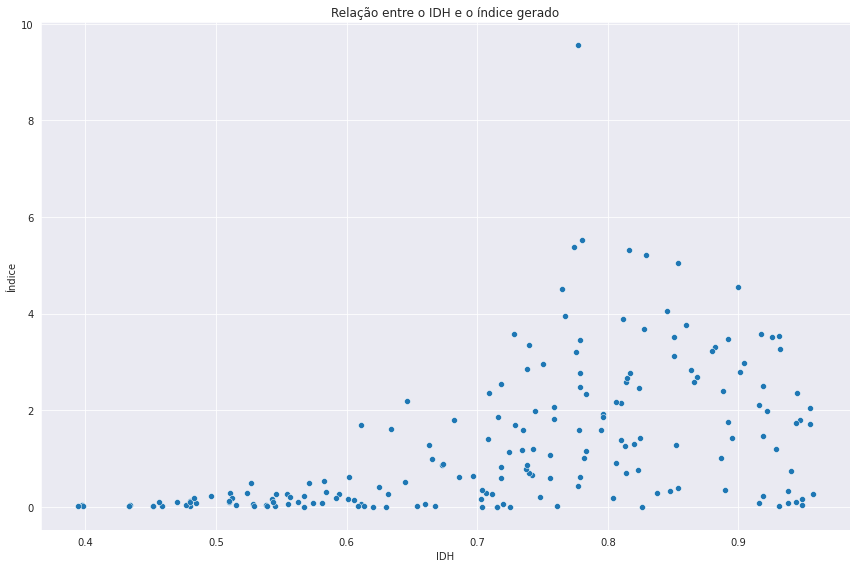

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(data=idh_mortes_indice,
                x='human_development_index', y='indice_mortes', ax=ax)
ax.set_title("Relação entre o IDH e o índice gerado")
ax.set_xlabel("IDH")
ax.set_ylabel("Índice")

plt.tight_layout();

Ainda não é possível tirar grandes conclusões a respeito, mas acredito que esse gráfico pode ser divido em 3 partes:

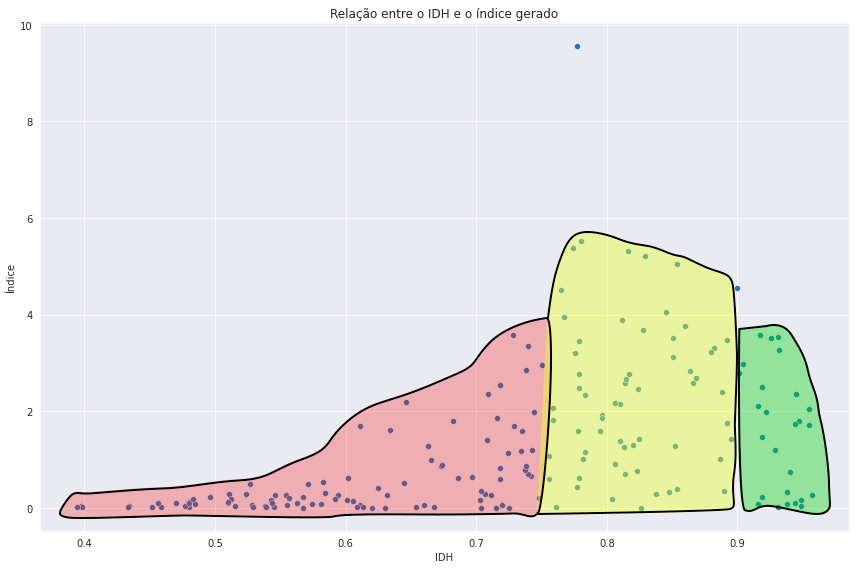

Na parte vermelho, eu entendo que temos os países que apesar não serem os que possuem os maiores índices, por possuirem um IDH mais baixo, possuem muitos casos de subnotificação e falta de testes.

Os grupos amarelos e verde já encaro como países que, devido ao valor do IDH possuem mais capacidades e por isso puderam notificar e quantificar de uma forma mais precisa os casos de covid.

Sendo que o amarelo são os países que não obtiveram bons resultados na luta contra o COVID e e em verde os países que devido ao elevado IDH puderam enfrentar melhor a pandemia.

### Análise para o Brasil

Para finalizar a análise, vamos verificar como se comportou a curva de casos no Brasil e visualizarmos na prática se houve ou não o achatamento que era muito buscado no início da pandemia:

In [ ]:
brazil_deaths = df[df.location == 'Brazil'][['new_deaths', 'date']].dropna().set_index('date')
brazil_cases = df[df.location == 'Brazil'][['new_cases', 'date']].dropna().set_index('date')

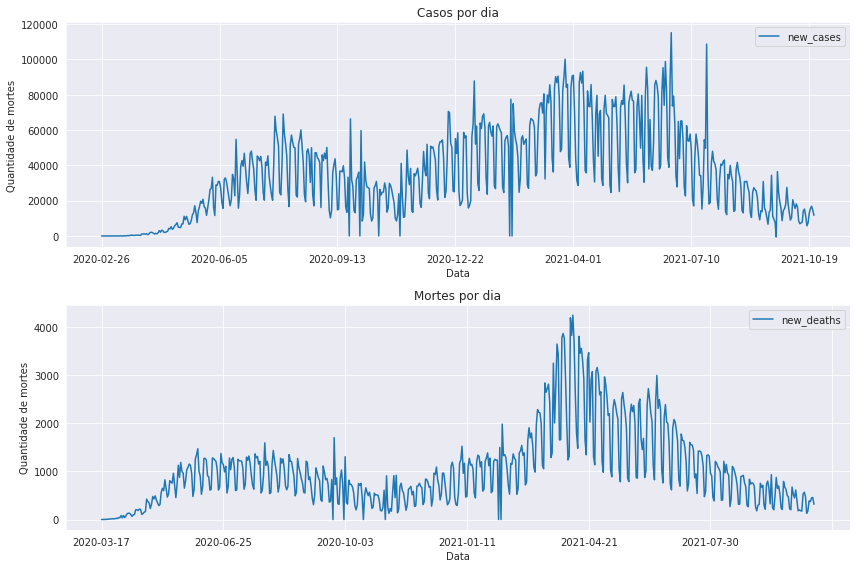

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,8))

brazil_cases.plot(ax=ax[0])
ax[0].set_title("Casos por dia")
ax[0].set_ylabel("Quantidade de mortes")
ax[0].set_xlabel("Data")

brazil_deaths.plot(ax=ax[1])
ax[1].set_title("Mortes por dia")
ax[1].set_ylabel("Quantidade de mortes")
ax[1].set_xlabel("Data")

plt.tight_layout();

Apesar da visualização estar bem compreensível, vou refazer esses gráficos com a média móvel para tirar um pouco desse ruído:

In [ ]:
brazil_deaths_smoothed = df[df.location == 'Brazil'][['new_deaths_smoothed', 'date']].dropna().set_index('date')
brazil_cases_smoothed = df[df.location == 'Brazil'][['new_cases_smoothed', 'date']].dropna().set_index('date')

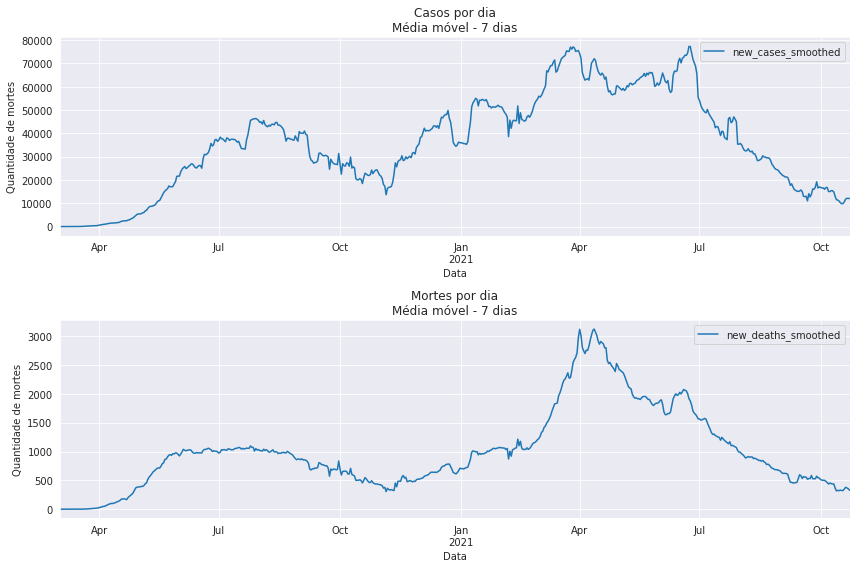

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,8))

brazil_cases_smoothed.plot(ax=ax[0])
ax[0].set_title("Casos por dia\nMédia móvel - 7 dias")
ax[0].set_ylabel("Quantidade de mortes")
ax[0].set_xlabel("Data")

brazil_deaths_smoothed.plot(ax=ax[1])
ax[1].set_title("Mortes por dia\nMédia móvel - 7 dias")
ax[1].set_ylabel("Quantidade de mortes")
ax[1].set_xlabel("Data")

plt.tight_layout();

Podemos ver que houve 2 achatamentos nas curvas de casos e mortes. Um deles por volta de Outubro de 2020 e outro no segundo semestre de 2021.

## Conclusão

Como podemos ver, a COVID 19 é uma doença muito grave que mudou o curso da história. Sua aparição repentina fez com que não tivessemos uma conduta planejada para reagir.

Tal fato é muito perceptível quando analisamos os dados e vemos que nem sempre o que era para ser lógico é o que está acontecendo. E nos mostra o tamanho da importância a coleta e a análise de dados.

Se com um vírus que causou uma pandemia, onde o mundo todo está se esforçando para coletar dados ainda não temos informações conclusivas, imagina o que acontece quando alguém decide otimizar os processos de sua empresa e não possui nada registrado. 

Por isso, sempre colete dados, armazene e analise! O tempo todo! Quando a situação demandar, quem não está pronto, não terá vantagem!